In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

(800, 600, 4)


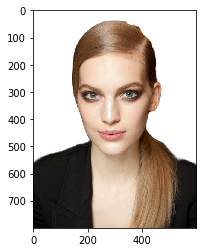

In [7]:
img = cv2.imread('D:/code/pytorch_learn/data/1803151818-00000077.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)  # 从 BGRA 转换为 RGBA
# img = img[..., [2,1,0,3]]
plt.imshow(img)
print(img.shape)

(800, 600)


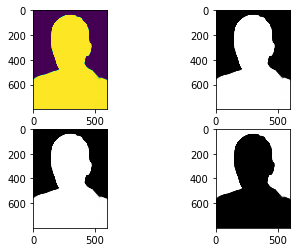

In [58]:
alpha = img[:,:,3]
print(alpha.shape)
plt.subplot(221); plt.imshow(alpha)
plt.subplot(222); plt.imshow(alpha, cmap ='gray')
plt.subplot(223); plt.imshow(alpha, cmap = plt.cm.gray)
plt.subplot(224); plt.imshow(alpha, cmap = plt.cm.gray_r)

(800, 600, 3)


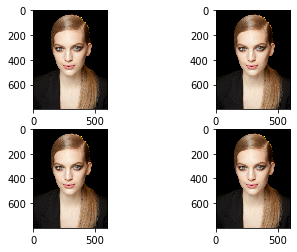

In [68]:
img = Image.open('D:/code/pytorch_learn/data/1803151818-00000077.png')
img = np.array(img)
if img.ndim == 3:
    img = img[:,:,:3]
print(img.shape)
plt.subplot(221); plt.imshow(img)
plt.subplot(222); plt.imshow(img, cmap ='gray')
plt.subplot(223); plt.imshow(img, cmap = plt.cm.gray)
plt.subplot(224); plt.imshow(img, cmap = plt.cm.gray_r)
plt.show()

(900, 900, 3)


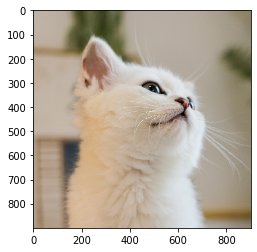

In [4]:
img = Image.open('data/mao.jpg')
img = np.array(img)
print(img.shape)
plt.imshow(img)

In [2]:
img = cv2.imread('D:/code/pytorch_learn/data/mao.jpg')
cv = cv2


def draw_circle(event, x, y, flags, param):
    if flags == cv.EVENT_FLAG_LBUTTON:
        cv.circle(img, (x, y), 10, (255, 0, 0, 0), -1)
        cv.circle(img_mask, (x, y), 10, (255, 255, 255), -1)


def draw_edge(image):
    cv.namedWindow('image', cv.WINDOW_NORMAL)
    cv.resizeWindow('image', 256, 385)
    cv.setMouseCallback('image', draw_circle)
    while True:
        cv.imshow('image', img)
        if cv.waitKey(1) & 0xFF == ord('q'):  # press q to exit
            cv.imwrite("mask.png", img_mask)
            break
    cv.destroyAllWindows()
    return img_mask.astype(np.uint8)


def contours_fill(image):
    _, binImg = cv.threshold(image, 100, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(binImg, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(image, contours, 0, (255, 255, 255), cv.FILLED)
    cv.imshow('Contours Image', image)
    cv.imwrite('alpha.png', image)
    print(contours[1].shape)
    cv.waitKey()
    cv.destroyAllWindows()
    return image.astype(np.uint8)


def generate_trimap(alpha):
    fg = np.array(np.equal(alpha, 255).astype(np.float32))
    # fg = cv.erode(fg, kernel, iterations=np.random.randint(1, 3))
    unknown = np.array(np.not_equal(alpha, 0).astype(np.float32))
    unknown = cv.dilate(unknown, kernel, iterations=np.random.randint(1, 100))
    trimap = fg * 255 + (unknown - fg) * 128
    cv.imwrite('trimap.png', trimap)
    return trimap.astype(np.uint8)


def main():
    drawed_edge = draw_edge(img)
    alpha = contours_fill(drawed_edge)
    trimap = generate_trimap(alpha)
    cv.imshow('img', trimap)
    cv.imwrite('trimap.png', trimap)
    cv.waitKey(0)
    cv.destroyAllWindows()


In [4]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
img = cv.imread('D:/code/pytorch_learn/data/mao.jpg')
h, w, _ = img.shape
img_mask = np.zeros((h, w), dtype=np.uint8)
main()

(4, 1, 2)


In [6]:
from pymatting import cutout

cutout(
    # input image path
    "D:/code/pytorch_learn/data/mao.jpg",
    # input trimap path
    "D:/code/pytorch_learn/data/trimap.png",
    # output cutout path
    "lemur_cutout.png")

In [8]:
print(plt.gcf().get_size_inches())

[6. 4.]


<Figure size 432x288 with 0 Axes>